# Importing Libraries for performing different operations

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip -uq "/content/drive/MyDrive/Fire_VS NO_ Fire /Fire-vs-NoFire.zip" -d "/content/Project"

In [5]:
!unzip -uq "/content/Project/Fire-vs-NoFire/Test.zip" -d "/content/Project/Fire-vs-NoFire"

In [6]:
!unzip -uq "/content/Project/Fire-vs-NoFire/Training.zip" -d "/content/Project/Fire-vs-NoFire"

In [7]:
import os

In [9]:
print('fire test:', len(os.listdir('/content/Project/Fire-vs-NoFire/Test/Fire')))
print('no fire test:', len(os.listdir('/content/Project/Fire-vs-NoFire/Test/No_Fire')))

fire test: 5137
no fire test: 3480


In [10]:
print('fire training:', len(os.listdir('/content/Project/Fire-vs-NoFire/Training/Fire')))
print('no fire training:', len(os.listdir('/content/Project/Fire-vs-NoFire/Training/No_Fire')))

fire training: 25018
no fire training: 14357


In [11]:
train_dir ='/content/Project/Fire-vs-NoFire/Training'
test_dir ='/content/Project/Fire-vs-NoFire/Test'

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(254, 254), 
                                                    batch_size=10,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(test_dir,
                                                        target_size=(254, 254),
                                                        batch_size=10,
                                                        class_mode='binary')

Found 39375 images belonging to 2 classes.
Found 8617 images belonging to 2 classes.


In [13]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(254, 254, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 230400)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [15]:
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [17]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 116s 1s/step - loss: 0.4961 - acc: 0.7862 - val_loss: 1.0953 - val_acc: 0.5400
Epoch 2/30
100/100 [==============================] - 112s 1s/step - loss: 0.2527 - acc: 0.9233 - val_loss: 1.1374 - val_acc: 0.6400
Epoch 3/30
100/100 [==============================] - 111s 1s/step - loss: 0.1826 - acc: 0.9394 - val_loss: 1.0272 - val_acc: 0.6300
Epoch 4/30
100/100 [==============================] - 113s 1s/step - loss: 0.1347 - acc: 0.9514 - val_loss: 1.1832 - val_acc: 0.5100
Epoch 5/30
100/100 [==============================] - 111s 1s/step - loss: 0.1057 - acc: 0.9720 - val_loss: 1.0652 - val_acc: 0.4600
Epoch 6/30
100/100 [==============================] - 113s 1s/step - loss: 0.0980 - acc: 0.9741 - val_loss: 0.9633 - val_acc: 0.5000
Epoch 7/30
100/100 [==============================] - 114s 1s/step - loss: 0.0797 - acc: 0.9706 - val_loss: 0.7804 - val_acc: 0.5800
Epoch 8/30
100/100 [==============================] - 115s 1s/step - 

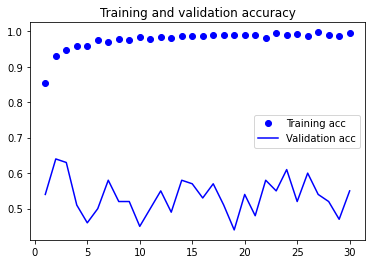

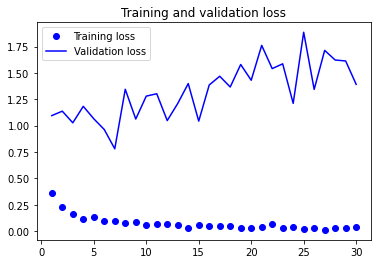

In [18]:
model.save('Fire_VS_NOFire.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
model.save("model.h5")

In [23]:
from tensorflow.keras import backend as K 

K.clear_session()
del model

In [24]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(254, 254),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(254, 254),
        batch_size=32,
        class_mode='binary')

Found 39375 images belonging to 2 classes.
Found 8617 images belonging to 2 classes.


In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(254, 254, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [27]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 464s 5s/step - loss: 0.3006 - acc: 0.9106 - val_loss: 0.8623 - val_acc: 0.6375
Epoch 2/20
100/100 [==============================] - 478s 5s/step - loss: 0.2279 - acc: 0.9274 - val_loss: 0.7876 - val_acc: 0.6031
Epoch 3/20
100/100 [==============================] - 476s 5s/step - loss: 0.1830 - acc: 0.9428 - val_loss: 1.4049 - val_acc: 0.3844
Epoch 4/20
100/100 [==============================] - 472s 5s/step - loss: 0.1577 - acc: 0.9463 - val_loss: 0.9235 - val_acc: 0.5906
Epoch 5/20
100/100 [==============================] - 478s 5s/step - loss: 0.2039 - acc: 0.9337 - val_loss: 1.1205 - val_acc: 0.5719
Epoch 6/20
100/100 [==============================] - 469s 5s/step - loss: 0.1702 - acc: 0.9372 - val_loss: 1.0584 - val_acc: 0.5344
Epoch 7/20
100/100 [==============================] - 482s 5s/step - loss: 0.1422 - acc: 0.9516 - val_loss: 1.0675 - val_acc: 0.6125
Epoch 8/20
100/100 [==============================] - 474s 5s/step - 